In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data_telco_customer_churn.csv")

df.columns = df.columns.str.strip()

df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [2]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [3]:
df['Churn'].value_counts()
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.733063
Yes,0.266937


In [4]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [5]:
df['Churn'].value_counts()

,count
Churn,
0,3614
1,1316


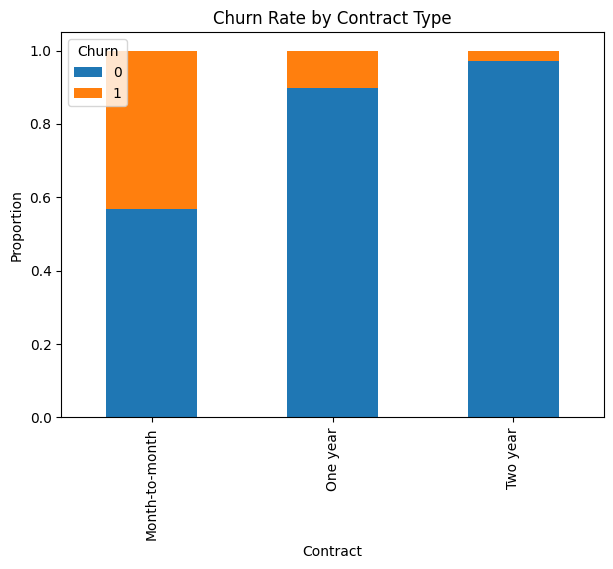

In [6]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index')\
    .plot(kind='bar', stacked=True, figsize=(7,5))

plt.title("Churn Rate by Contract Type")
plt.ylabel("Proportion")
plt.show()

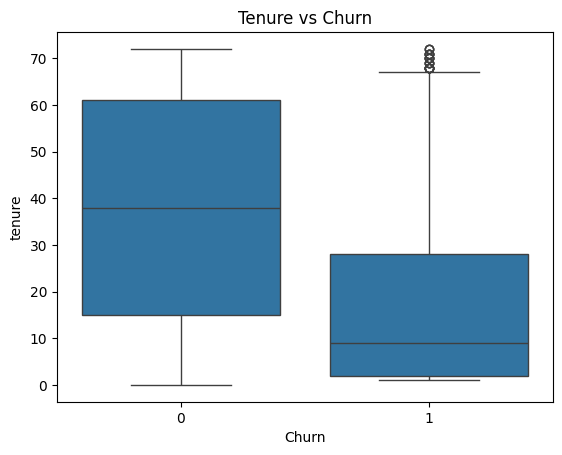

In [7]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

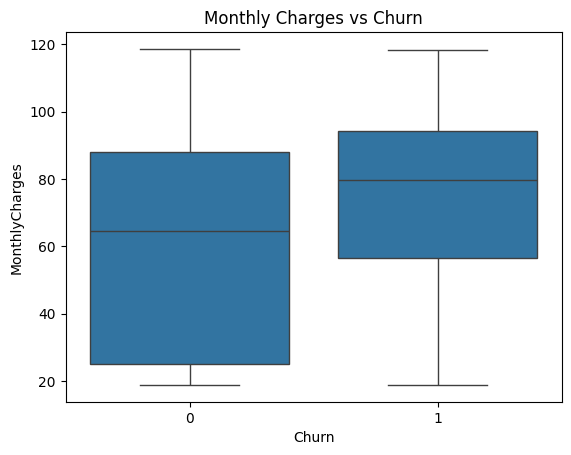

In [8]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

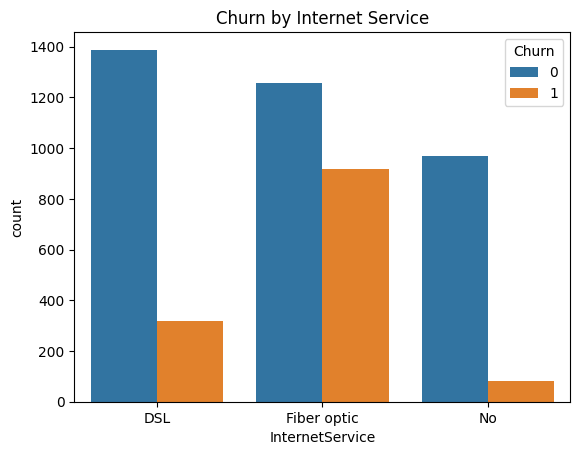

In [9]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()

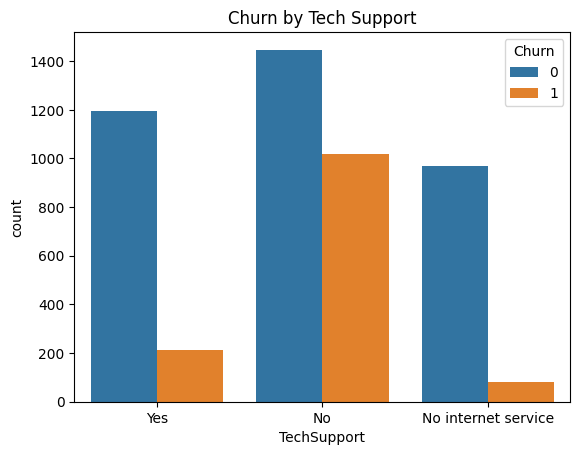

In [10]:
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title("Churn by Tech Support")
plt.show()

In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [12]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import accuracy_score

log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

print("Logistic Accuracy:", accuracy_score(y_test, log_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Logistic Accuracy: 0.7789046653144016
Random Forest Accuracy: 0.7626774847870182


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       695
           1       0.64      0.45      0.53       291

    accuracy                           0.76       986
   macro avg       0.72      0.67      0.68       986
weighted avg       0.75      0.76      0.75       986



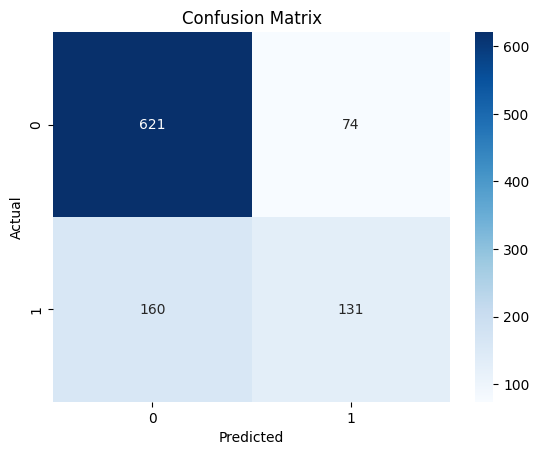

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

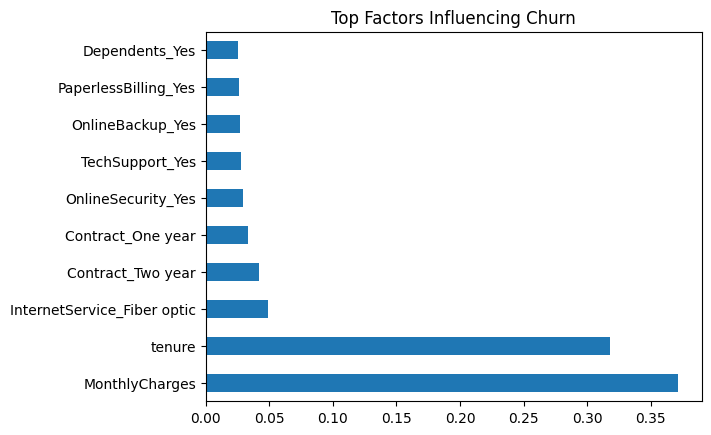

In [19]:
importance = pd.Series(rf_model.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='barh')

plt.title("Top Factors Influencing Churn")
plt.show()